Downloading...
From: https://drive.google.com/uc?id=15FqnWO2ZSrWIjrZjMszGKd4MO43EyT1W
To: /content/base.csv
100%|██████████| 719k/719k [00:00<00:00, 114MB/s]


Valores nulos em cada coluna:
N° ocorrência    0
Data             0
Classificação    0
Localidade       0
UF               0
Aeródromo        0
Operação         1
dtype: int64
Linhas duplicadas:
Empty DataFrame
Columns: [N° ocorrência, Data, Classificação, Localidade, UF, Aeródromo, Operação]
Index: []
Melhores hiperparâmetros para Random Forest:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost:
{'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para LightGBM:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Random Forest Classifier com Undersampling
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       142
           1       0.81      0.76      0.79       142
           2       0.52      0.53    

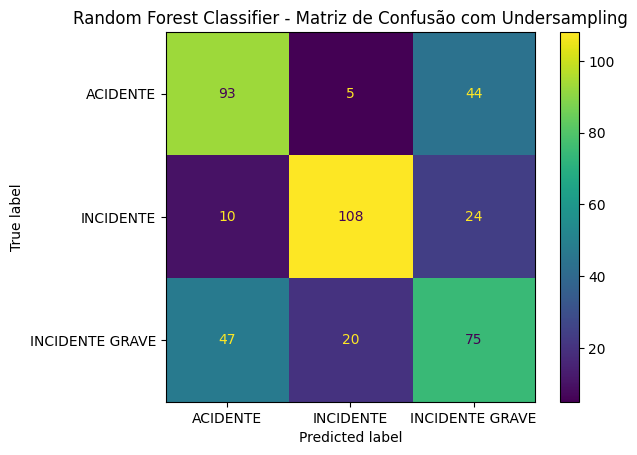

XGBoost Classifier com Undersampling
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       142
           1       0.80      0.78      0.79       142
           2       0.52      0.53      0.52       142

    accuracy                           0.64       426
   macro avg       0.64      0.64      0.64       426
weighted avg       0.64      0.64      0.64       426



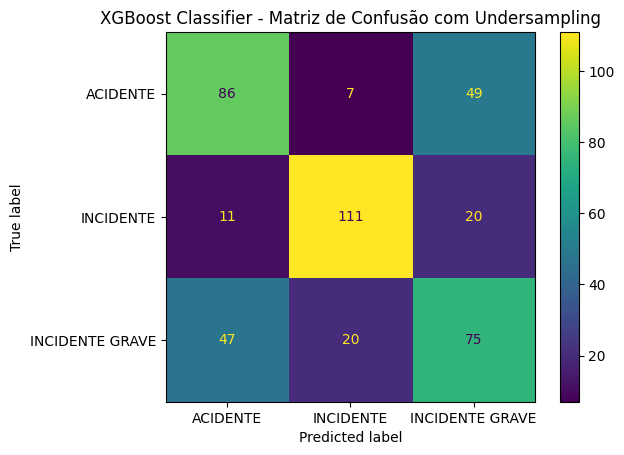

LightGBM Classifier com Undersampling
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       142
           1       0.80      0.71      0.75       142
           2       0.50      0.60      0.54       142

    accuracy                           0.63       426
   macro avg       0.64      0.63      0.63       426
weighted avg       0.64      0.63      0.63       426



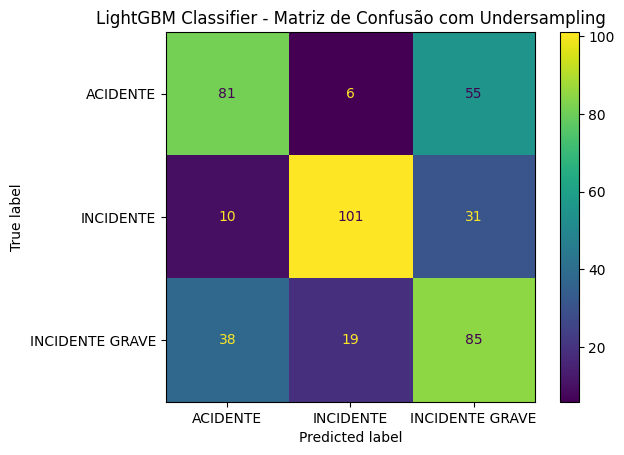

Random Forest Accuracy com Undersampling: 64.79%
XGBoost Accuracy com Undersampling: 63.85%
LightGBM Accuracy com Undersampling: 62.68%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
import joblib
import matplotlib.pyplot as plt
from gdown import download

# Download da base de dados
url = 'https://drive.google.com/uc?id=15FqnWO2ZSrWIjrZjMszGKd4MO43EyT1W'
output = 'base.csv'

download(url, output, quiet=False)

# Carregar dados e definir colunas
df = pd.read_csv('base.csv', sep=';', encoding='utf-8')

# Remover as colunas "Status" e "Tipo"
df.drop(columns=['Status', 'Tipo', 'Matrícula'], inplace=True)

# Salvar a base de dados processada em um novo arquivo CSV
df.to_csv('processed_base.csv', index=False)

# Valores nulos em cada coluna
valores_nulos = df.isnull().sum()
print("Valores nulos em cada coluna:")
print(valores_nulos)

# Encontrar linhas com dados iguais em todas as colunas
linhas_duplicadas = df[df.duplicated(keep=False)]
print("Linhas duplicadas:")
print(linhas_duplicadas)

# Codificação das variáveis categóricas
categorical_features = ['Localidade', 'UF', 'Aeródromo', 'Operação']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Codificação da variável alvo
label_encoder = LabelEncoder()
df['Classificação'] = label_encoder.fit_transform(df['Classificação'])

# Dividindo os dados em conjunto de treino e teste
X = df.drop('Classificação', axis=1)
y = df['Classificação']

# Separar os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir o pipeline para o Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Definir o pipeline para o XGBoost
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(random_state=42))])

# Definir o pipeline para o LightGBM
lgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LGBMClassifier(random_state=42, verbosity=-1))])

# Definir o espaço de hiperparâmetros para o GridSearch para Random Forest
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Definir o espaço de hiperparâmetros para o GridSearch para XGBoost
xgb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Definir o espaço de hiperparâmetros para o GridSearch para LightGBM
lgb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [-1, 10, 20],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Configurar o GridSearchCV para Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
print("Melhores hiperparâmetros para Random Forest:")
print(rf_grid_search.best_params_)

# Configurar o GridSearchCV para XGBoost
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)
print("Melhores hiperparâmetros para XGBoost:")
print(xgb_grid_search.best_params_)

# Configurar o GridSearchCV para LightGBM
lgb_grid_search = GridSearchCV(lgb_pipeline, lgb_param_grid, cv=5, scoring='accuracy')
lgb_grid_search.fit(X_train, y_train)
print("Melhores hiperparâmetros para LightGBM:")
print(lgb_grid_search.best_params_)

# Aplicar undersampling após o GridSearchCV
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Separando novamente os dados em treino e teste com dados balanceados
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Treinamento e avaliação com dados balanceados

# Random Forest com os melhores hiperparâmetros
best_rf_pipeline = rf_grid_search.best_estimator_
best_rf_pipeline.fit(X_train_resampled, y_train_resampled)
rf_pred = best_rf_pipeline.predict(X_test_resampled)
print("Random Forest Classifier com Undersampling")
print(classification_report(y_test_resampled, rf_pred))

# Matriz de confusão para Random Forest
rf_cm = confusion_matrix(y_test_resampled, rf_pred, labels=best_rf_pipeline.named_steps['classifier'].classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=label_encoder.classes_)
disp_rf.plot()
plt.title('Random Forest Classifier - Matriz de Confusão com Undersampling')
plt.show()

# Salvar o modelo Random Forest
joblib.dump(best_rf_pipeline, 'random_forest_model.pkl')

# XGBoost com os melhores hiperparâmetros
best_xgb_pipeline = xgb_grid_search.best_estimator_
best_xgb_pipeline.fit(X_train_resampled, y_train_resampled)
xgb_pred = best_xgb_pipeline.predict(X_test_resampled)
print("XGBoost Classifier com Undersampling")
print(classification_report(y_test_resampled, xgb_pred))

# Matriz de confusão para XGBoost
xgb_cm = confusion_matrix(y_test_resampled, xgb_pred, labels=best_xgb_pipeline.named_steps['classifier'].classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=label_encoder.classes_)
disp_xgb.plot()
plt.title('XGBoost Classifier - Matriz de Confusão com Undersampling')
plt.show()

# Salvar o modelo XGBoost
joblib.dump(best_xgb_pipeline, 'xgboost_model.pkl')

# LightGBM com os melhores hiperparâmetros
best_lgb_pipeline = lgb_grid_search.best_estimator_
best_lgb_pipeline.fit(X_train_resampled, y_train_resampled)
lgb_pred = best_lgb_pipeline.predict(X_test_resampled)
print("LightGBM Classifier com Undersampling")
print(classification_report(y_test_resampled, lgb_pred))

# Matriz de confusão para LightGBM
lgb_cm = confusion_matrix(y_test_resampled, lgb_pred, labels=best_lgb_pipeline.named_steps['classifier'].classes_)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=lgb_cm, display_labels=label_encoder.classes_)
disp_lgb.plot()
plt.title('LightGBM Classifier - Matriz de Confusão com Undersampling')
plt.show()

# Salvar o modelo LightGBM
joblib.dump(best_lgb_pipeline, 'lightgbm_model.pkl')

# Avaliação
print(f"Random Forest Accuracy com Undersampling: {accuracy_score(y_test_resampled, rf_pred) * 100:.2f}%")
print(f"XGBoost Accuracy com Undersampling: {accuracy_score(y_test_resampled, xgb_pred) * 100:.2f}%")
print(f"LightGBM Accuracy com Undersampling: {accuracy_score(y_test_resampled, lgb_pred) * 100:.2f}%")
